Script Features:
1. imports first scans for every participant
2. Utilizes least squares and MSE to estimate individual scans from mean averages
3. cutoff_LP functionality to activated to remove jitters and changes based on the lowpass value used for bandpass filter

In [1]:
from fn_cfg import *
import params as cfg

In [48]:
'first_scan_per_all_participants.csv'
filename = 'first_scan_per_all_participants.csv'
localPath_data = '/Users/joshuaighalo/Downloads/brainNet_datasets/laurel_place/cleaned_dataset'
localPath_ = "/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/"
file_dir = localPath_+filename
image_dest_dir = '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/grand_averages'
image_dir_2 = '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/Q_grp_avgs_1.1'
version = 1.0
disp = "Cz"
cutoff_LP = [True,cfg.lowPass]

In [ ]:
def multiple_least_squares(mean_runs,multiple_runs):
    def least_squares(x, y):
        return np.sum((x - y)**2)
    output = []
    for i in range(len(multiple_runs)):
        output.append(least_squares(mean_runs,multiple_runs[i]))
    output = np.array(output)
    return output

def multiple_MSE(mean_runs,multiple_runs):
    def MSE(x, y):
        return np.sum((x - y)**2)/len(x)
    output = []
    for i in range(len(multiple_runs)):
        output.append(MSE(mean_runs,multiple_runs[i]))
    output = np.array(output)
    return output

def threshold(datacolumn,filenames,varName):
    cutoff = (np.median(abs(datacolumn))/0.6745)*(np.sqrt(2*np.log(len(datacolumn))))
    bool_pass = datacolumn < int(cutoff)
    bool_fail = datacolumn > int(cutoff)
    qf_files = filenames[bool_pass]
    rj_files = filenames[bool_fail]
    print(varName + ' => '+ "threshold: " + str(int(cutoff)))
    print(varName + ": " + str(len(qf_files)) + " files passed threshold")
    print(varName + ": " + str(len(rj_files)) + " files failed threshold")
    print('\n')
    return qf_files,int(cutoff)

def plots(x,y_1,y_2,gnd_1,gnd_2,arrayName,arrayColor,title,imgName,destination_dir):
    def plot_ERP(destination_dir,data_1,data_2,data_3,data_4,latency,header,x_label,y_label,label_1,label_2,label_3,label_4,color_1,color_2,color_3,color_4,amp_range,img_name):
        fig, ax = plt.subplots()
        time = latency
        ax.plot(time, data_1,color_1, label = label_1)
        ax.plot(time, data_2,color_2, label = label_2)
        ax.plot(time, data_3,color_3, label = label_3)
        ax.plot(time, data_4,color_4, label = label_4)        
        ax.set_title(header)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        fig.tight_layout()
        ax.xaxis.set_major_locator(MultipleLocator(100)) # add major ticks on x axis         
        plt.vlines(x=[0.0], ymin=20,ymax=-20, colors='green', ls='--',lw=2)
        ax.invert_yaxis()
        plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')  
        plt.savefig(destination_dir+'/'+header+'_'+img_name+'.png',bbox_inches='tight')
        plt.show()
    gnd_1 = gnd_1.reshape(len(gnd_1.T))
    gnd_2 = gnd_2.reshape(len(gnd_2.T))
    for i in range(len(y_1)):
        plot_ERP(destination_dir,y_1[i],y_2[i],gnd_1,gnd_2,x,title[i],'Latency (ms)','Amplitude (uV)',arrayName[0],arrayName[1],arrayName[2],arrayName[3],arrayColor[0],arrayColor[1],arrayColor[2],arrayColor[3],10,imgName[i])


In [3]:
"""
Bad scans in No_Threshold.csv:
These scans have all their epochs possessing peak to peak exceeding clipping threshold of 75uV
As such, all their epochs are removed from the analysis, resulting in no waveform generated

8-Months No Dementia
0038_1_05122019_1456
0408_1_13122019_1521

8-Months Moderate Dementia
0003_1_13122019_1352
0087_1_06122019_1222
0104_1_05122019_1522
0120_1_18122019_1048

8-Months Severe Dementia
0110_1_21112019_1051
0135_1_18122019_1138
0406_1_05122019_1339
0407_1_13122019_1444
"""

'\nBad scans in No_Threshold.csv:\nThese scans have all their epochs possessing peak to peak exceeding clipping threshold of 75uV\nAs such, all their epochs are removed from the analysis, resulting in no waveform generated\n\n8-Months No Dementia\n0038_1_05122019_1456\n0408_1_13122019_1521\n\n8-Months Moderate Dementia\n0003_1_13122019_1352\n0087_1_06122019_1222\n0104_1_05122019_1522\n0120_1_18122019_1048\n\n8-Months Severe Dementia\n0110_1_21112019_1051\n0135_1_18122019_1138\n0406_1_05122019_1339\n0407_1_13122019_1444\n'

In [4]:
#   baseline scans for different dementia classes
quality_scans = pd.read_csv(file_dir)

In [5]:
#   Baseline
base_ND = [x for x in (quality_scans['Baseline No Dementia'].to_numpy()) if str(x) != 'nan']
base_MILD = [x for x in (quality_scans['Baseline Mild Dementia'].to_numpy()) if str(x) != 'nan']
base_MODERATE = [x for x in (quality_scans['Baseline Moderate Dementia'].to_numpy()) if str(x) != 'nan']
base_SEVERE = [x for x in (quality_scans['Baseline Severe Dementia'].to_numpy()) if str(x) != 'nan']

#   6-Months 
six_ND = [x for x in (quality_scans['4-months No Dementia'].to_numpy()) if str(x) != 'nan']
six_MILD = [x for x in (quality_scans['4-months Mild Dementia'].to_numpy()) if str(x) != 'nan']
six_MODERATE = [x for x in (quality_scans['4-months Moderate Dementia'].to_numpy()) if str(x) != 'nan']
six_SEVERE = [x for x in (quality_scans['4-months Severe Dementia'].to_numpy()) if str(x) != 'nan']

#   12-Months
twelve_ND = [x for x in (quality_scans['8-months No Dementia'].to_numpy()) if str(x) != 'nan']
twelve_MILD = [x for x in (quality_scans['8-months Mild Dementia'].to_numpy()) if str(x) != 'nan']
twelve_MODERATE = [x for x in (quality_scans['8-months Moderate Dementia'].to_numpy()) if str(x) != 'nan']
twelve_SEVERE = [x for x in (quality_scans['8-months Severe Dementia'].to_numpy()) if str(x) != 'nan']

ERPs of Cognitive Impairment Classes @ Baseline
No Dementia @ Baseline
Cz : 0402_1_25022019_1438  removed for standard tones N1P3 analysis as all its epochs exceed the clip value of 75
Cz : 0402_1_25022019_1438  removed for deviant tones N1P3 analysis as all its epochs exceed the clip value of 75
Cz : 0402_1_25022019_1438  removed for congruent words N4 analysis as all its epochs exceed the clip value of 75
Cz : 0402_1_25022019_1438  removed for incongruent words N4 analysis as all its epochs exceed the clip value of 75


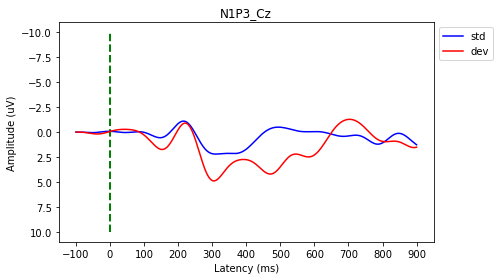

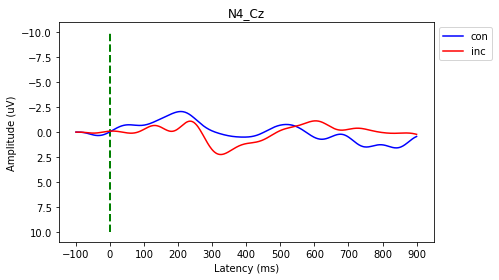

Mild Dementia @ Baseline


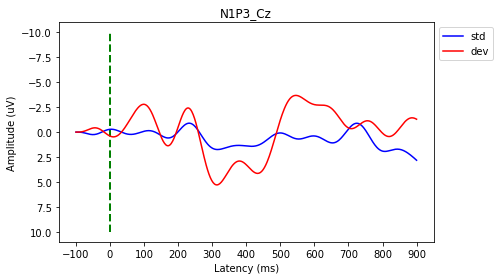

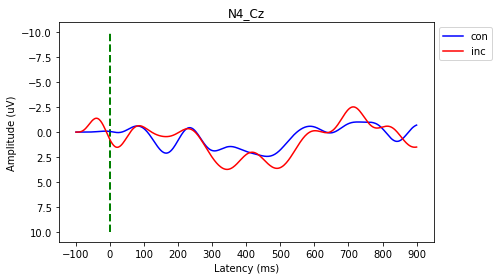

Moderate Dementia @ Baseline


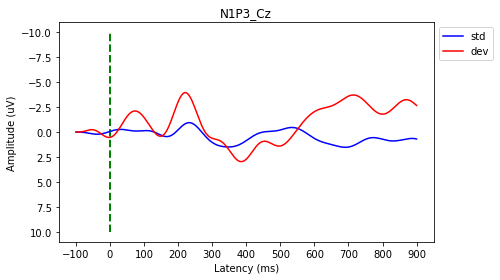

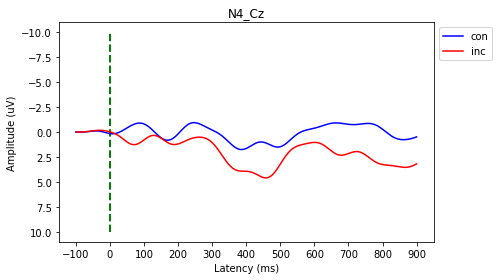

Severe Dementia @ Baseline
Cz : 0014_1_17042019_1029  removed for standard tones N1P3 analysis as all its epochs exceed the clip value of 75
Cz : 0014_1_17042019_1029  removed for deviant tones N1P3 analysis as all its epochs exceed the clip value of 75
Cz : 0014_1_17042019_1029  removed for congruent words N4 analysis as all its epochs exceed the clip value of 75
Cz : 0014_1_17042019_1029  removed for incongruent words N4 analysis as all its epochs exceed the clip value of 75
Cz : 0069_1_25022019_1353  removed for standard tones N1P3 analysis as all its epochs exceed the clip value of 75
Cz : 0069_1_25022019_1353  removed for deviant tones N1P3 analysis as all its epochs exceed the clip value of 75
Cz : 0069_1_25022019_1353  removed for congruent words N4 analysis as all its epochs exceed the clip value of 75
Cz : 0069_1_25022019_1353  removed for incongruent words N4 analysis as all its epochs exceed the clip value of 75


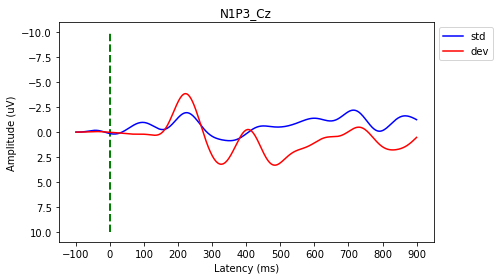

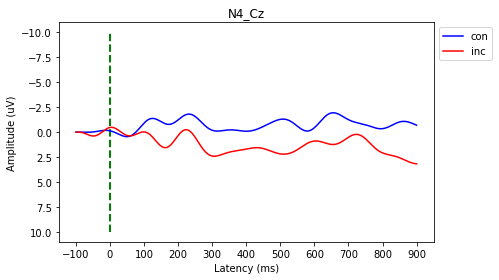

In [8]:
print("ERPs of Cognitive Impairment Classes @ Baseline")
nd_baseline = averageERPs(device_version=version,chanNames=cfg.channelNames,scan_IDs=base_ND,dispIMG_Channel=disp,local_path=localPath_data,fs=cfg.fs,line=cfg.line,lowcut=cfg.highPass,highcut=cfg.lowPass,stimTrig=cfg.stimTrig,clip=cfg.clip,lowPassERP=cutoff_LP,label="No Dementia @ Baseline",img_name="No Dementia @ Baseline",destination_dir=image_dest_dir)
mild_baseline = averageERPs(device_version=version,chanNames=cfg.channelNames,scan_IDs=base_MILD,dispIMG_Channel=disp,local_path=localPath_data,fs=cfg.fs,line=cfg.line,lowcut=cfg.highPass,highcut=cfg.lowPass,stimTrig=cfg.stimTrig,clip=cfg.clip,lowPassERP=cutoff_LP,label="Mild Dementia @ Baseline",img_name="Mild Dementia @ Baseline",destination_dir=image_dest_dir)
moderate_baseline = averageERPs(device_version=version,chanNames=cfg.channelNames,scan_IDs=base_MODERATE,dispIMG_Channel=disp,local_path=localPath_data,fs=cfg.fs,line=cfg.line,lowcut=cfg.highPass,highcut=cfg.lowPass,stimTrig=cfg.stimTrig,clip=cfg.clip,lowPassERP=cutoff_LP,label="Moderate Dementia @ Baseline",img_name="Moderate Dementia @ Baseline",destination_dir=image_dest_dir)
severe_baseline = averageERPs(device_version=version,chanNames=cfg.channelNames,scan_IDs=base_SEVERE,dispIMG_Channel=disp,local_path=localPath_data,fs=cfg.fs,line=cfg.line,lowcut=cfg.highPass,highcut=cfg.lowPass,stimTrig=cfg.stimTrig,clip=cfg.clip,lowPassERP=cutoff_LP,label="Severe Dementia @ Baseline",img_name="Severe Dementia @ Baseline",destination_dir=image_dest_dir)

print("ERPs of Cognitive Impairment Classes @ 4-months")
nd_6 = averageERPs(device_version=version,chanNames=cfg.channelNames,scan_IDs=six_ND,dispIMG_Channel=disp,local_path=localPath_data,fs=cfg.fs,line=cfg.line,lowcut=cfg.highPass,highcut=cfg.lowPass,stimTrig=cfg.stimTrig,clip=cfg.clip,lowPassERP=cutoff_LP,label="No Dementia @ 4-months",img_name="No Dementia @ 4-months",destination_dir=image_dest_dir)
mild_6 = averageERPs(device_version=version,chanNames=cfg.channelNames,scan_IDs=six_MILD,dispIMG_Channel=disp,local_path=localPath_data,fs=cfg.fs,line=cfg.line,lowcut=cfg.highPass,highcut=cfg.lowPass,stimTrig=cfg.stimTrig,clip=cfg.clip,lowPassERP=cutoff_LP,label="Mild Dementia @ 4-months",img_name="Mild Dementia @ 4-months",destination_dir=image_dest_dir)
moderate_6 = averageERPs(device_version=version,chanNames=cfg.channelNames,scan_IDs=six_MODERATE,dispIMG_Channel=disp,local_path=localPath_data,fs=cfg.fs,line=cfg.line,lowcut=cfg.highPass,highcut=cfg.lowPass,stimTrig=cfg.stimTrig,clip=cfg.clip,lowPassERP=cutoff_LP,label="Moderate Dementia @ 4-months",img_name="Moderate Dementia @ 4-months",destination_dir=image_dest_dir)
severe_6 = averageERPs(device_version=version,chanNames=cfg.channelNames,scan_IDs=six_SEVERE,dispIMG_Channel=disp,local_path=localPath_data,fs=cfg.fs,line=cfg.line,lowcut=cfg.highPass,highcut=cfg.lowPass,stimTrig=cfg.stimTrig,clip=cfg.clip,lowPassERP=cutoff_LP,label="Severe Dementia @ 4-months",img_name="Severe Dementia @ 4-months",destination_dir=image_dest_dir)

print("ERPs of Cognitive Impairment Classes @ 8-months")
nd_12 = averageERPs(device_version=version,chanNames=cfg.channelNames,scan_IDs=twelve_ND,dispIMG_Channel=disp,local_path=localPath_data,fs=cfg.fs,line=cfg.line,lowcut=cfg.highPass,highcut=cfg.lowPass,stimTrig=cfg.stimTrig,clip=cfg.clip,lowPassERP=cutoff_LP,label="No Dementia @ 8-months",img_name="No Dementia @ 8-months",destination_dir=image_dest_dir)
mild_12 = averageERPs(device_version=version,chanNames=cfg.channelNames,scan_IDs=twelve_MILD,dispIMG_Channel=disp,local_path=localPath_data,fs=cfg.fs,line=cfg.line,lowcut=cfg.highPass,highcut=cfg.lowPass,stimTrig=cfg.stimTrig,clip=cfg.clip,lowPassERP=cutoff_LP,label="Mild Dementia @ 8-months",img_name="Mild Dementia @ 8-months",destination_dir=image_dest_dir)
moderate_12 = averageERPs(device_version=version,chanNames=cfg.channelNames,scan_IDs=twelve_MODERATE,dispIMG_Channel=disp,local_path=localPath_data,fs=cfg.fs,line=cfg.line,lowcut=cfg.highPass,highcut=cfg.lowPass,stimTrig=cfg.stimTrig,clip=cfg.clip,lowPassERP=cutoff_LP,label="Moderate Dementia @ 8-months",img_name="Moderate Dementia @ 8-months",destination_dir=image_dest_dir)
severe_12 = averageERPs(device_version=version,chanNames=cfg.channelNames,scan_IDs=twelve_SEVERE,dispIMG_Channel=disp,local_path=localPath_data,fs=cfg.fs,line=cfg.line,lowcut=cfg.highPass,highcut=cfg.lowPass,stimTrig=cfg.stimTrig,clip=cfg.clip,lowPassERP=cutoff_LP,label="Severe Dementia @ 8-months",img_name="Severe Dementia @ 8-months",destination_dir=image_dest_dir)

In [11]:
"""
extract the mean and individual waveforms
"""
latency = nd_baseline[0][12]

# Baseline
cz_mean_nd_baseline_std = nd_baseline[0][2]
cz_mean_nd_baseline_std = cz_mean_nd_baseline_std.reshape(1,cz_mean_nd_baseline_std.shape[0])
cz_mean_nd_baseline_dev = nd_baseline[0][3]
cz_mean_nd_baseline_dev = cz_mean_nd_baseline_dev.reshape(1,cz_mean_nd_baseline_dev.shape[0])
cz_mean_nd_baseline_con = nd_baseline[0][8]
cz_mean_nd_baseline_con = cz_mean_nd_baseline_con.reshape(1,cz_mean_nd_baseline_con.shape[0])
cz_mean_nd_baseline_inc = nd_baseline[0][9]
cz_mean_nd_baseline_inc = cz_mean_nd_baseline_inc.reshape(1,cz_mean_nd_baseline_inc.shape[0])
cz_indiv_nd_baseline_std = nd_baseline[1][:,2,:]
cz_indiv_nd_baseline_dev = nd_baseline[1][:,3,:]
cz_indiv_nd_baseline_con = nd_baseline[1][:,8,:]
cz_indiv_nd_baseline_inc = nd_baseline[1][:,9,:]

cz_mean_mild_baseline_std = mild_baseline[0][2]
cz_mean_mild_baseline_std = cz_mean_mild_baseline_std.reshape(1,cz_mean_mild_baseline_std.shape[0])
cz_mean_mild_baseline_dev = mild_baseline[0][3]
cz_mean_mild_baseline_dev = cz_mean_mild_baseline_dev.reshape(1,cz_mean_mild_baseline_dev.shape[0])
cz_mean_mild_baseline_con = mild_baseline[0][8]
cz_mean_mild_baseline_con = cz_mean_mild_baseline_con.reshape(1,cz_mean_mild_baseline_con.shape[0])
cz_mean_mild_baseline_inc = mild_baseline[0][9]
cz_mean_mild_baseline_inc = cz_mean_mild_baseline_inc.reshape(1,cz_mean_mild_baseline_inc.shape[0])
cz_indiv_mild_baseline_std = mild_baseline[1][:,2,:]
cz_indiv_mild_baseline_dev = mild_baseline[1][:,3,:]
cz_indiv_mild_baseline_con = mild_baseline[1][:,8,:]
cz_indiv_mild_baseline_inc = mild_baseline[1][:,9,:]

cz_mean_moderate_baseline_std = moderate_baseline[0][2]
cz_mean_moderate_baseline_std = cz_mean_moderate_baseline_std.reshape(1,cz_mean_moderate_baseline_std.shape[0])
cz_mean_moderate_baseline_dev = moderate_baseline[0][3]
cz_mean_moderate_baseline_dev = cz_mean_moderate_baseline_dev.reshape(1,cz_mean_moderate_baseline_dev.shape[0])
cz_mean_moderate_baseline_con = moderate_baseline[0][8]
cz_mean_moderate_baseline_con = cz_mean_moderate_baseline_con.reshape(1,cz_mean_moderate_baseline_con.shape[0])
cz_mean_moderate_baseline_inc = moderate_baseline[0][9]
cz_mean_moderate_baseline_inc = cz_mean_moderate_baseline_inc.reshape(1,cz_mean_moderate_baseline_inc.shape[0])
cz_indiv_moderate_baseline_std = moderate_baseline[1][:,2,:]
cz_indiv_moderate_baseline_dev = moderate_baseline[1][:,3,:]
cz_indiv_moderate_baseline_con = moderate_baseline[1][:,8,:]
cz_indiv_moderate_baseline_inc = moderate_baseline[1][:,9,:]

cz_mean_severe_baseline_std = severe_baseline[0][2]
cz_mean_severe_baseline_std = cz_mean_severe_baseline_std.reshape(1,cz_mean_severe_baseline_std.shape[0])
cz_mean_severe_baseline_dev = severe_baseline[0][3]
cz_mean_severe_baseline_dev = cz_mean_severe_baseline_dev.reshape(1,cz_mean_severe_baseline_dev.shape[0])
cz_mean_severe_baseline_con = severe_baseline[0][8]
cz_mean_severe_baseline_con = cz_mean_severe_baseline_con.reshape(1,cz_mean_severe_baseline_con.shape[0])
cz_mean_severe_baseline_inc = severe_baseline[0][9]
cz_mean_severe_baseline_inc = cz_mean_severe_baseline_inc.reshape(1,cz_mean_severe_baseline_inc.shape[0])
cz_indiv_severe_baseline_std = severe_baseline[1][:,2,:]
cz_indiv_severe_baseline_dev = severe_baseline[1][:,3,:]
cz_indiv_severe_baseline_con = severe_baseline[1][:,8,:]
cz_indiv_severe_baseline_inc = severe_baseline[1][:,9,:]


# 6-months
cz_mean_nd_6_std = nd_6[0][2]
cz_mean_nd_6_std = cz_mean_nd_6_std.reshape(1,cz_mean_nd_6_std.shape[0])
cz_mean_nd_6_dev = nd_6[0][3]
cz_mean_nd_6_dev = cz_mean_nd_6_dev.reshape(1,cz_mean_nd_6_dev.shape[0])
cz_mean_nd_6_con = nd_6[0][8]
cz_mean_nd_6_con = cz_mean_nd_6_con.reshape(1,cz_mean_nd_6_con.shape[0])
cz_mean_nd_6_inc = nd_6[0][9]
cz_mean_nd_6_inc = cz_mean_nd_6_inc.reshape(1,cz_mean_nd_6_inc.shape[0])
cz_indiv_nd_6_std = nd_6[1][:,2,:]
cz_indiv_nd_6_dev = nd_6[1][:,3,:]
cz_indiv_nd_6_con = nd_6[1][:,8,:]
cz_indiv_nd_6_inc = nd_6[1][:,9,:]

cz_mean_mild_6_std = mild_6[0][2]
cz_mean_mild_6_std = cz_mean_mild_6_std.reshape(1,cz_mean_mild_6_std.shape[0])
cz_mean_mild_6_dev = mild_6[0][3]
cz_mean_mild_6_dev = cz_mean_mild_6_dev.reshape(1,cz_mean_mild_6_dev.shape[0])
cz_mean_mild_6_con = mild_6[0][8]
cz_mean_mild_6_con = cz_mean_mild_6_con.reshape(1,cz_mean_mild_6_con.shape[0])
cz_mean_mild_6_inc = mild_6[0][9]
cz_mean_mild_6_inc = cz_mean_mild_6_inc.reshape(1,cz_mean_mild_6_inc.shape[0])
cz_indiv_mild_6_std = mild_6[1][:,2,:]
cz_indiv_mild_6_dev = mild_6[1][:,3,:]
cz_indiv_mild_6_con = mild_6[1][:,8,:]
cz_indiv_mild_6_inc = mild_6[1][:,9,:]

cz_mean_moderate_6_std = moderate_6[0][2]
cz_mean_moderate_6_std = cz_mean_moderate_6_std.reshape(1,cz_mean_moderate_6_std.shape[0])
cz_mean_moderate_6_dev = moderate_6[0][3]
cz_mean_moderate_6_dev = cz_mean_moderate_6_dev.reshape(1,cz_mean_moderate_6_dev.shape[0])
cz_mean_moderate_6_con = moderate_6[0][8]
cz_mean_moderate_6_con = cz_mean_moderate_6_con.reshape(1,cz_mean_moderate_6_con.shape[0])
cz_mean_moderate_6_inc = moderate_6[0][9]
cz_mean_moderate_6_inc = cz_mean_moderate_6_inc.reshape(1,cz_mean_moderate_6_inc.shape[0])
cz_indiv_moderate_6_std = moderate_6[1][:,2,:]
cz_indiv_moderate_6_dev = moderate_6[1][:,3,:]
cz_indiv_moderate_6_con = moderate_6[1][:,8,:]
cz_indiv_moderate_6_inc = moderate_6[1][:,9,:]

cz_mean_severe_6_std = severe_6[0][2]
cz_mean_severe_6_std = cz_mean_severe_6_std.reshape(1,cz_mean_severe_6_std.shape[0])
cz_mean_severe_6_dev = severe_6[0][3]
cz_mean_severe_6_dev = cz_mean_severe_6_dev.reshape(1,cz_mean_severe_6_dev.shape[0])
cz_mean_severe_6_con = severe_6[0][8]
cz_mean_severe_6_con = cz_mean_severe_6_con.reshape(1,cz_mean_severe_6_con.shape[0])
cz_mean_severe_6_inc = severe_6[0][9]
cz_mean_severe_6_inc = cz_mean_severe_6_inc.reshape(1,cz_mean_severe_6_inc.shape[0])
cz_indiv_severe_6_std = severe_6[1][:,2,:]
cz_indiv_severe_6_dev = severe_6[1][:,3,:]
cz_indiv_severe_6_con = severe_6[1][:,8,:]
cz_indiv_severe_6_inc = severe_6[1][:,9,:]

# 12-months
cz_mean_nd_12_std = nd_12[0][2]
cz_mean_nd_12_std = cz_mean_nd_12_std.reshape(1,cz_mean_nd_12_std.shape[0])
cz_mean_nd_12_dev = nd_12[0][3]
cz_mean_nd_12_dev = cz_mean_nd_12_dev.reshape(1,cz_mean_nd_12_dev.shape[0])
cz_mean_nd_12_con = nd_12[0][8]
cz_mean_nd_12_con = cz_mean_nd_12_con.reshape(1,cz_mean_nd_12_con.shape[0])
cz_mean_nd_12_inc = nd_12[0][9]
cz_mean_nd_12_inc = cz_mean_nd_12_inc.reshape(1,cz_mean_nd_12_inc.shape[0])
cz_indiv_nd_12_std = nd_12[1][:,2,:]
cz_indiv_nd_12_dev = nd_12[1][:,3,:]
cz_indiv_nd_12_con = nd_12[1][:,8,:]
cz_indiv_nd_12_inc = nd_12[1][:,9,:]

cz_mean_mild_12_std = mild_12[0][2]
cz_mean_mild_12_std = cz_mean_mild_12_std.reshape(1,cz_mean_mild_12_std.shape[0])
cz_mean_mild_12_dev = mild_12[0][3]
cz_mean_mild_12_dev = cz_mean_mild_12_dev.reshape(1,cz_mean_mild_12_dev.shape[0])
cz_mean_mild_12_con = mild_12[0][8]
cz_mean_mild_12_con = cz_mean_mild_12_con.reshape(1,cz_mean_mild_12_con.shape[0])
cz_mean_mild_12_inc = mild_12[0][9]
cz_mean_mild_12_inc = cz_mean_mild_12_inc.reshape(1,cz_mean_mild_12_inc.shape[0])
cz_indiv_mild_12_std = mild_12[1][:,2,:]
cz_indiv_mild_12_dev = mild_12[1][:,3,:]
cz_indiv_mild_12_con = mild_12[1][:,8,:]
cz_indiv_mild_12_inc = mild_12[1][:,9,:]

cz_mean_moderate_12_std = moderate_12[0][2]
cz_mean_moderate_12_std = cz_mean_moderate_12_std.reshape(1,cz_mean_moderate_12_std.shape[0])
cz_mean_moderate_12_dev = moderate_12[0][3]
cz_mean_moderate_12_dev = cz_mean_moderate_12_dev.reshape(1,cz_mean_moderate_12_dev.shape[0])
cz_mean_moderate_12_con = moderate_12[0][8]
cz_mean_moderate_12_con = cz_mean_moderate_12_con.reshape(1,cz_mean_moderate_12_con.shape[0])
cz_mean_moderate_12_inc = moderate_12[0][9]
cz_mean_moderate_12_inc = cz_mean_moderate_12_inc.reshape(1,cz_mean_moderate_12_inc.shape[0])
cz_indiv_moderate_12_std = moderate_12[1][:,2,:]
cz_indiv_moderate_12_dev = moderate_12[1][:,3,:]
cz_indiv_moderate_12_con = moderate_12[1][:,8,:]
cz_indiv_moderate_12_inc = moderate_12[1][:,9,:]

cz_mean_severe_12_std = severe_12[0][2]
cz_mean_severe_12_std = cz_mean_severe_12_std.reshape(1,cz_mean_severe_12_std.shape[0])
cz_mean_severe_12_dev = severe_12[0][3]
cz_mean_severe_12_dev = cz_mean_severe_12_dev.reshape(1,cz_mean_severe_12_dev.shape[0])
cz_mean_severe_12_con = severe_12[0][8]
cz_mean_severe_12_con = cz_mean_severe_12_con.reshape(1,cz_mean_severe_12_con.shape[0])
cz_mean_severe_12_inc = severe_12[0][9]
cz_mean_severe_12_inc = cz_mean_severe_12_inc.reshape(1,cz_mean_severe_12_inc.shape[0])
cz_indiv_severe_12_std = severe_12[1][:,2,:]
cz_indiv_severe_12_dev = severe_12[1][:,3,:]
cz_indiv_severe_12_con = severe_12[1][:,8,:]
cz_indiv_severe_12_inc = severe_12[1][:,9,:]

In [14]:
"Apply least squares between mean average and individual average"

# No-dementia
coeff_cz_nd_baseline_std = multiple_least_squares(cz_mean_nd_baseline_std,cz_indiv_nd_baseline_std)
coeff_cz_nd_baseline_dev = multiple_least_squares(cz_mean_nd_baseline_dev,cz_indiv_nd_baseline_dev)
coeff_cz_nd_baseline_con = multiple_least_squares(cz_mean_nd_baseline_con,cz_indiv_nd_baseline_con)
coeff_cz_nd_baseline_inc = multiple_least_squares(cz_mean_nd_baseline_inc,cz_indiv_nd_baseline_inc)
coeff_cz_nd_6_std = multiple_least_squares(cz_mean_nd_6_std,cz_indiv_nd_6_std)
coeff_cz_nd_6_dev = multiple_least_squares(cz_mean_nd_6_dev,cz_indiv_nd_6_dev)
coeff_cz_nd_6_con = multiple_least_squares(cz_mean_nd_6_con,cz_indiv_nd_6_con)
coeff_cz_nd_6_inc = multiple_least_squares(cz_mean_nd_6_inc,cz_indiv_nd_6_inc)
coeff_cz_nd_12_std = multiple_least_squares(cz_mean_nd_12_std,cz_indiv_nd_12_std)
coeff_cz_nd_12_dev = multiple_least_squares(cz_mean_nd_12_dev,cz_indiv_nd_12_dev)
coeff_cz_nd_12_con = multiple_least_squares(cz_mean_nd_12_con,cz_indiv_nd_12_con)
coeff_cz_nd_12_inc = multiple_least_squares(cz_mean_nd_12_inc,cz_indiv_nd_12_inc)

# Mild dementia
coeff_cz_mild_baseline_std = multiple_least_squares(cz_mean_mild_baseline_std,cz_indiv_mild_baseline_std)
coeff_cz_mild_baseline_dev = multiple_least_squares(cz_mean_mild_baseline_dev,cz_indiv_mild_baseline_dev)
coeff_cz_mild_baseline_con = multiple_least_squares(cz_mean_mild_baseline_con,cz_indiv_mild_baseline_con)
coeff_cz_mild_baseline_inc = multiple_least_squares(cz_mean_mild_baseline_inc,cz_indiv_mild_baseline_inc)
coeff_cz_mild_6_std = multiple_least_squares(cz_mean_mild_6_std,cz_indiv_mild_6_std)
coeff_cz_mild_6_dev = multiple_least_squares(cz_mean_mild_6_dev,cz_indiv_mild_6_dev)
coeff_cz_mild_6_con = multiple_least_squares(cz_mean_mild_6_con,cz_indiv_mild_6_con)
coeff_cz_mild_6_inc = multiple_least_squares(cz_mean_mild_6_inc,cz_indiv_mild_6_inc)
coeff_cz_mild_12_std = multiple_least_squares(cz_mean_mild_12_std,cz_indiv_mild_12_std)
coeff_cz_mild_12_dev = multiple_least_squares(cz_mean_mild_12_dev,cz_indiv_mild_12_dev)
coeff_cz_mild_12_con = multiple_least_squares(cz_mean_mild_12_con,cz_indiv_mild_12_con)
coeff_cz_mild_12_inc = multiple_least_squares(cz_mean_mild_12_inc,cz_indiv_mild_12_inc)

# Moderate dementia
coeff_cz_moderate_baseline_std = multiple_least_squares(cz_mean_moderate_baseline_std,cz_indiv_moderate_baseline_std)
coeff_cz_moderate_baseline_dev = multiple_least_squares(cz_mean_moderate_baseline_dev,cz_indiv_moderate_baseline_dev)
coeff_cz_moderate_baseline_con = multiple_least_squares(cz_mean_moderate_baseline_con,cz_indiv_moderate_baseline_con)
coeff_cz_moderate_baseline_inc = multiple_least_squares(cz_mean_moderate_baseline_inc,cz_indiv_moderate_baseline_inc)
coeff_cz_moderate_6_std = multiple_least_squares(cz_mean_moderate_6_std,cz_indiv_moderate_6_std)
coeff_cz_moderate_6_dev = multiple_least_squares(cz_mean_moderate_6_dev,cz_indiv_moderate_6_dev)
coeff_cz_moderate_6_con = multiple_least_squares(cz_mean_moderate_6_con,cz_indiv_moderate_6_con)
coeff_cz_moderate_6_inc = multiple_least_squares(cz_mean_moderate_6_inc,cz_indiv_moderate_6_inc)
coeff_cz_moderate_12_std = multiple_least_squares(cz_mean_moderate_12_std,cz_indiv_moderate_12_std)
coeff_cz_moderate_12_dev = multiple_least_squares(cz_mean_moderate_12_dev,cz_indiv_moderate_12_dev)
coeff_cz_moderate_12_con = multiple_least_squares(cz_mean_moderate_12_con,cz_indiv_moderate_12_con)
coeff_cz_moderate_12_inc = multiple_least_squares(cz_mean_moderate_12_inc,cz_indiv_moderate_12_inc)

# Severe dementia
coeff_cz_severe_baseline_std = multiple_least_squares(cz_mean_severe_baseline_std,cz_indiv_severe_baseline_std)
coeff_cz_severe_baseline_dev = multiple_least_squares(cz_mean_severe_baseline_dev,cz_indiv_severe_baseline_dev)
coeff_cz_severe_baseline_con = multiple_least_squares(cz_mean_severe_baseline_con,cz_indiv_severe_baseline_con)
coeff_cz_severe_baseline_inc = multiple_least_squares(cz_mean_severe_baseline_inc,cz_indiv_severe_baseline_inc)
coeff_cz_severe_6_std = multiple_least_squares(cz_mean_severe_6_std,cz_indiv_severe_6_std)
coeff_cz_severe_6_dev = multiple_least_squares(cz_mean_severe_6_dev,cz_indiv_severe_6_dev)
coeff_cz_severe_6_con = multiple_least_squares(cz_mean_severe_6_con,cz_indiv_severe_6_con)
coeff_cz_severe_6_inc = multiple_least_squares(cz_mean_severe_6_inc,cz_indiv_severe_6_inc)
coeff_cz_severe_12_std = multiple_least_squares(cz_mean_severe_12_std,cz_indiv_severe_12_std)
coeff_cz_severe_12_dev = multiple_least_squares(cz_mean_severe_12_dev,cz_indiv_severe_12_dev)
coeff_cz_severe_12_con = multiple_least_squares(cz_mean_severe_12_con,cz_indiv_severe_12_con)
coeff_cz_severe_12_inc = multiple_least_squares(cz_mean_severe_12_inc,cz_indiv_severe_12_inc)


"Apply MSE between mean average and individual average"

# No-dementia
mse_cz_nd_baseline_std = multiple_MSE(cz_mean_nd_baseline_std,cz_indiv_nd_baseline_std)
mse_cz_nd_baseline_dev = multiple_MSE(cz_mean_nd_baseline_dev,cz_indiv_nd_baseline_dev)
mse_cz_nd_baseline_con = multiple_MSE(cz_mean_nd_baseline_con,cz_indiv_nd_baseline_con)
mse_cz_nd_baseline_inc = multiple_MSE(cz_mean_nd_baseline_inc,cz_indiv_nd_baseline_inc)
mse_cz_nd_6_std = multiple_MSE(cz_mean_nd_6_std,cz_indiv_nd_6_std)
mse_cz_nd_6_dev = multiple_MSE(cz_mean_nd_6_dev,cz_indiv_nd_6_dev)
mse_cz_nd_6_con = multiple_MSE(cz_mean_nd_6_con,cz_indiv_nd_6_con)
mse_cz_nd_6_inc = multiple_MSE(cz_mean_nd_6_inc,cz_indiv_nd_6_inc)
mse_cz_nd_12_std = multiple_MSE(cz_mean_nd_12_std,cz_indiv_nd_12_std)
mse_cz_nd_12_dev = multiple_MSE(cz_mean_nd_12_dev,cz_indiv_nd_12_dev)
mse_cz_nd_12_con = multiple_MSE(cz_mean_nd_12_con,cz_indiv_nd_12_con)
mse_cz_nd_12_inc = multiple_MSE(cz_mean_nd_12_inc,cz_indiv_nd_12_inc)

# Mild dementia
mse_cz_mild_baseline_std = multiple_MSE(cz_mean_mild_baseline_std,cz_indiv_mild_baseline_std)
mse_cz_mild_baseline_dev = multiple_MSE(cz_mean_mild_baseline_dev,cz_indiv_mild_baseline_dev)
mse_cz_mild_baseline_con = multiple_MSE(cz_mean_mild_baseline_con,cz_indiv_mild_baseline_con)
mse_cz_mild_baseline_inc = multiple_MSE(cz_mean_mild_baseline_inc,cz_indiv_mild_baseline_inc)
mse_cz_mild_6_std = multiple_MSE(cz_mean_mild_6_std,cz_indiv_mild_6_std)
mse_cz_mild_6_dev = multiple_MSE(cz_mean_mild_6_dev,cz_indiv_mild_6_dev)
mse_cz_mild_6_con = multiple_MSE(cz_mean_mild_6_con,cz_indiv_mild_6_con)
mse_cz_mild_6_inc = multiple_MSE(cz_mean_mild_6_inc,cz_indiv_mild_6_inc)
mse_cz_mild_12_std = multiple_MSE(cz_mean_mild_12_std,cz_indiv_mild_12_std)
mse_cz_mild_12_dev = multiple_MSE(cz_mean_mild_12_dev,cz_indiv_mild_12_dev)
mse_cz_mild_12_con = multiple_MSE(cz_mean_mild_12_con,cz_indiv_mild_12_con)
mse_cz_mild_12_inc = multiple_MSE(cz_mean_mild_12_inc,cz_indiv_mild_12_inc)

# Moderate dementia
mse_cz_moderate_baseline_std = multiple_MSE(cz_mean_moderate_baseline_std,cz_indiv_moderate_baseline_std)
mse_cz_moderate_baseline_dev = multiple_MSE(cz_mean_moderate_baseline_dev,cz_indiv_moderate_baseline_dev)
mse_cz_moderate_baseline_con = multiple_MSE(cz_mean_moderate_baseline_con,cz_indiv_moderate_baseline_con)
mse_cz_moderate_baseline_inc = multiple_MSE(cz_mean_moderate_baseline_inc,cz_indiv_moderate_baseline_inc)
mse_cz_moderate_6_std = multiple_MSE(cz_mean_moderate_6_std,cz_indiv_moderate_6_std)
mse_cz_moderate_6_dev = multiple_MSE(cz_mean_moderate_6_dev,cz_indiv_moderate_6_dev)
mse_cz_moderate_6_con = multiple_MSE(cz_mean_moderate_6_con,cz_indiv_moderate_6_con)
mse_cz_moderate_6_inc = multiple_MSE(cz_mean_moderate_6_inc,cz_indiv_moderate_6_inc)
mse_cz_moderate_12_std = multiple_MSE(cz_mean_moderate_12_std,cz_indiv_moderate_12_std)
mse_cz_moderate_12_dev = multiple_MSE(cz_mean_moderate_12_dev,cz_indiv_moderate_12_dev)
mse_cz_moderate_12_con = multiple_MSE(cz_mean_moderate_12_con,cz_indiv_moderate_12_con)
mse_cz_moderate_12_inc = multiple_MSE(cz_mean_moderate_12_inc,cz_indiv_moderate_12_inc)

# Severe dementia
mse_cz_severe_baseline_std = multiple_MSE(cz_mean_severe_baseline_std,cz_indiv_severe_baseline_std)
mse_cz_severe_baseline_dev = multiple_MSE(cz_mean_severe_baseline_dev,cz_indiv_severe_baseline_dev)
mse_cz_severe_baseline_con = multiple_MSE(cz_mean_severe_baseline_con,cz_indiv_severe_baseline_con)
mse_cz_severe_baseline_inc = multiple_MSE(cz_mean_severe_baseline_inc,cz_indiv_severe_baseline_inc)
mse_cz_severe_6_std = multiple_MSE(cz_mean_severe_6_std,cz_indiv_severe_6_std)
mse_cz_severe_6_dev = multiple_MSE(cz_mean_severe_6_dev,cz_indiv_severe_6_dev)
mse_cz_severe_6_con = multiple_MSE(cz_mean_severe_6_con,cz_indiv_severe_6_con)
mse_cz_severe_6_inc = multiple_MSE(cz_mean_severe_6_inc,cz_indiv_severe_6_inc)
mse_cz_severe_12_std = multiple_MSE(cz_mean_severe_12_std,cz_indiv_severe_12_std)
mse_cz_severe_12_dev = multiple_MSE(cz_mean_severe_12_dev,cz_indiv_severe_12_dev)
mse_cz_severe_12_con = multiple_MSE(cz_mean_severe_12_con,cz_indiv_severe_12_con)
mse_cz_severe_12_inc = multiple_MSE(cz_mean_severe_12_inc,cz_indiv_severe_12_inc)

In [ ]:
"Export MSE scores"
df = pd.DataFrame({'Participants':base_ND,'std':mse_cz_nd_baseline_std,'dev':mse_cz_nd_baseline_dev,'con':mse_cz_nd_baseline_con,'inc':mse_cz_nd_baseline_inc})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/mse scores/no dementia baseline.csv',index=False)
df = pd.DataFrame({'Participants':six_ND,'std':mse_cz_nd_6_std,'dev':mse_cz_nd_6_dev,'con':mse_cz_nd_6_con,'inc':mse_cz_nd_6_inc})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/mse scores/no dementia 6 months.csv',index=False)
df = pd.DataFrame({'Participants':twelve_ND,'std':mse_cz_nd_12_std,'dev':mse_cz_nd_12_dev,'con':mse_cz_nd_12_con,'inc':mse_cz_nd_12_inc})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/mse scores/no dementia 12 months.csv',index=False)
df = pd.DataFrame({'Participants':base_MILD,'std':mse_cz_mild_baseline_std,'dev':mse_cz_mild_baseline_dev,'con':mse_cz_mild_baseline_con,'inc':mse_cz_mild_baseline_inc})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/mse scores/mild baseline.csv',index=False)
df = pd.DataFrame({'Participants':six_MILD,'std':mse_cz_mild_6_std,'dev':mse_cz_mild_6_dev,'con':mse_cz_mild_6_con,'inc':mse_cz_mild_6_inc})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/mse scores/mild 6 months.csv',index=False)
df = pd.DataFrame({'Participants':twelve_MILD,'std':mse_cz_mild_12_std,'dev':mse_cz_mild_12_dev,'con':mse_cz_mild_12_con,'inc':mse_cz_mild_12_inc})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/mse scores/mild 12 months.csv',index=False)
df = pd.DataFrame({'Participants':base_MODERATE,'std':mse_cz_moderate_baseline_std,'dev':mse_cz_moderate_baseline_dev,'con':mse_cz_moderate_baseline_con,'inc':mse_cz_moderate_baseline_inc})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/mse scores/moderate baseline.csv',index=False)
df = pd.DataFrame({'Participants':six_MODERATE,'std':mse_cz_moderate_6_std,'dev':mse_cz_moderate_6_dev,'con':mse_cz_moderate_6_con,'inc':mse_cz_moderate_6_inc})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/mse scores/moderate 6 months.csv',index=False)
df = pd.DataFrame({'Participants':twelve_MODERATE,'std':mse_cz_moderate_12_std,'dev':mse_cz_moderate_12_dev,'con':mse_cz_moderate_12_con,'inc':mse_cz_moderate_12_inc})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/mse scores/moderate 12 months.csv',index=False)
df = pd.DataFrame({'Participants':base_SEVERE,'std':mse_cz_severe_baseline_std,'dev':mse_cz_severe_baseline_dev,'con':mse_cz_severe_baseline_con,'inc':mse_cz_severe_baseline_inc})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/mse scores/severe baseline.csv',index=False)
df = pd.DataFrame({'Participants':six_SEVERE,'std':mse_cz_severe_6_std,'dev':mse_cz_severe_6_dev,'con':mse_cz_severe_6_con,'inc':mse_cz_severe_6_inc})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/mse scores/severe 6 months.csv',index=False)
df = pd.DataFrame({'Participants':twelve_SEVERE,'std':mse_cz_severe_12_std,'dev':mse_cz_severe_12_dev,'con':mse_cz_severe_12_con,'inc':mse_cz_severe_12_inc})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/mse scores/severe 12 months.csv',index=False)

"Export Least Square Coefficient"
df = pd.DataFrame({'Participants':base_ND,'std':coeff_cz_nd_baseline_std,'dev':coeff_cz_nd_baseline_dev,'con':coeff_cz_nd_baseline_con,'inc':coeff_cz_nd_baseline_inc})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/least squares scores/no dementia baseline.csv',index=False)
df = pd.DataFrame({'Participants':six_ND,'std':coeff_cz_nd_6_std,'dev':coeff_cz_nd_6_dev,'con':coeff_cz_nd_6_con,'inc':coeff_cz_nd_6_inc})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/least squares scores/no dementia 6 months.csv',index=False)
df = pd.DataFrame({'Participants':twelve_ND,'std':coeff_cz_nd_12_std,'dev':coeff_cz_nd_12_dev,'con':coeff_cz_nd_12_con,'inc':coeff_cz_nd_12_inc})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/least squares scores/no dementia 12 months.csv',index=False)
df = pd.DataFrame({'Participants':base_MILD,'std':coeff_cz_mild_baseline_std,'dev':coeff_cz_mild_baseline_dev,'con':coeff_cz_mild_baseline_con,'inc':coeff_cz_mild_baseline_inc})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/least squares scores/mild baseline.csv',index=False)
df = pd.DataFrame({'Participants':six_MILD,'std':coeff_cz_mild_6_std,'dev':coeff_cz_mild_6_dev,'con':coeff_cz_mild_6_con,'inc':coeff_cz_mild_6_inc})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/least squares scores/mild 6 months.csv',index=False)
df = pd.DataFrame({'Participants':twelve_MILD,'std':coeff_cz_mild_12_std,'dev':coeff_cz_mild_12_dev,'con':coeff_cz_mild_12_con,'inc':coeff_cz_mild_12_inc})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/least squares scores/mild 12 months.csv',index=False)
df = pd.DataFrame({'Participants':base_MODERATE,'std':coeff_cz_moderate_baseline_std,'dev':coeff_cz_moderate_baseline_dev,'con':coeff_cz_moderate_baseline_con,'inc':coeff_cz_moderate_baseline_inc})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/least squares scores/moderate baseline.csv',index=False)
df = pd.DataFrame({'Participants':six_MODERATE,'std':coeff_cz_moderate_6_std,'dev':coeff_cz_moderate_6_dev,'con':coeff_cz_moderate_6_con,'inc':coeff_cz_moderate_6_inc})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/least squares scores/moderate 6 months.csv',index=False)
df = pd.DataFrame({'Participants':twelve_MODERATE,'std':coeff_cz_moderate_12_std,'dev':coeff_cz_moderate_12_dev,'con':coeff_cz_moderate_12_con,'inc':coeff_cz_moderate_12_inc})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/least squares scores/moderate 12 months.csv',index=False)
df = pd.DataFrame({'Participants':base_SEVERE,'std':coeff_cz_severe_baseline_std,'dev':coeff_cz_severe_baseline_dev,'con':coeff_cz_severe_baseline_con,'inc':coeff_cz_severe_baseline_inc})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/least squares scores/severe baseline.csv',index=False)
df = pd.DataFrame({'Participants':six_SEVERE,'std':coeff_cz_severe_6_std,'dev':coeff_cz_severe_6_dev,'con':coeff_cz_severe_6_con,'inc':coeff_cz_severe_6_inc})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/least squares scores/severe 6 months.csv',index=False)
df = pd.DataFrame({'Participants':twelve_SEVERE,'std':coeff_cz_severe_12_std,'dev':coeff_cz_severe_12_dev,'con':coeff_cz_severe_12_con,'inc':coeff_cz_severe_12_inc})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/least squares scores/severe 12 months.csv',index=False)

In [ ]:
"Generate plots of the individual waveforms vs mean waveform"

color = ['blue','red','green','purple']
destDir_nd_baseline_tones = '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/nd_baseline_tones'
destDir_nd_baseline_words = '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/nd_baseline_words'
destDir_nd_6_tones = '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/nd_6_tones'
destDir_nd_6_words = '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/nd_6_words'
destDir_nd_12_tones = '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/nd_12_tones'
destDir_nd_12_words = '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/nd_12_words'
destDir_mild_baseline_tones = '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/mild_baseline_tones'
destDir_mild_baseline_words = '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/mild_baseline_words'
destDir_mild_6_tones = '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/mild_6_tones'
destDir_mild_6_words = '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/mild_6_words'
destDir_mild_12_tones = '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/mild_12_tones'
destDir_mild_12_words = '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/mild_12_words'
destDir_moderate_baseline_tones = '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/moderate_baseline_tones'
destDir_moderate_baseline_words = '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/moderate_baseline_words'
destDir_moderate_6_tones = '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/moderate_6_tones'
destDir_moderate_6_words = '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/moderate_6_words'
destDir_moderate_12_tones = '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/moderate_12_tones'
destDir_moderate_12_words = '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/moderate_12_words'
destDir_severe_baseline_tones = '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/severe_baseline_tones'
destDir_severe_baseline_words = '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/severe_baseline_words'
destDir_severe_6_tones = '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/severe_6_tones'
destDir_severe_6_words = '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/severe_6_words'
destDir_severe_12_tones = '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/severe_12_tones'
destDir_severe_12_words = '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/severe_12_words'


shutil.rmtree(destDir_nd_baseline_tones, ignore_errors=True)
os.makedirs(destDir_nd_baseline_tones)
shutil.rmtree(destDir_nd_baseline_words, ignore_errors=True)
os.makedirs(destDir_nd_baseline_words)
shutil.rmtree(destDir_nd_6_tones, ignore_errors=True)
os.makedirs(destDir_nd_6_tones)
shutil.rmtree(destDir_nd_6_words, ignore_errors=True)
os.makedirs(destDir_nd_6_words)
shutil.rmtree(destDir_nd_12_tones, ignore_errors=True)
os.makedirs(destDir_nd_12_tones)
shutil.rmtree(destDir_nd_12_words, ignore_errors=True)
os.makedirs(destDir_nd_12_words)
shutil.rmtree(destDir_mild_baseline_tones, ignore_errors=True)
os.makedirs(destDir_mild_baseline_tones)
shutil.rmtree(destDir_mild_baseline_words, ignore_errors=True)
os.makedirs(destDir_mild_baseline_words)
shutil.rmtree(destDir_mild_6_tones, ignore_errors=True)
os.makedirs(destDir_mild_6_tones)
shutil.rmtree(destDir_mild_6_words, ignore_errors=True)
os.makedirs(destDir_mild_6_words)
shutil.rmtree(destDir_mild_12_tones, ignore_errors=True)
os.makedirs(destDir_mild_12_tones)
shutil.rmtree(destDir_mild_12_words, ignore_errors=True)
os.makedirs(destDir_mild_12_words)
shutil.rmtree(destDir_moderate_baseline_tones, ignore_errors=True)
os.makedirs(destDir_moderate_baseline_tones)
shutil.rmtree(destDir_moderate_baseline_words, ignore_errors=True)
os.makedirs(destDir_moderate_baseline_words)
shutil.rmtree(destDir_moderate_6_tones, ignore_errors=True)
os.makedirs(destDir_moderate_6_tones)
shutil.rmtree(destDir_moderate_6_words, ignore_errors=True)
os.makedirs(destDir_moderate_6_words)
shutil.rmtree(destDir_moderate_12_tones, ignore_errors=True)
os.makedirs(destDir_moderate_12_tones)
shutil.rmtree(destDir_moderate_12_words, ignore_errors=True)
os.makedirs(destDir_moderate_12_words)
shutil.rmtree(destDir_severe_baseline_tones, ignore_errors=True)
os.makedirs(destDir_severe_baseline_tones)
shutil.rmtree(destDir_severe_baseline_words, ignore_errors=True)
os.makedirs(destDir_severe_baseline_words)
shutil.rmtree(destDir_severe_6_tones, ignore_errors=True)
os.makedirs(destDir_severe_6_tones)
shutil.rmtree(destDir_severe_6_words, ignore_errors=True)
os.makedirs(destDir_severe_6_words)
shutil.rmtree(destDir_severe_12_tones, ignore_errors=True)
os.makedirs(destDir_severe_12_tones)
shutil.rmtree(destDir_severe_12_words, ignore_errors=True)
os.makedirs(destDir_severe_12_words)


plots(latency,cz_indiv_nd_baseline_std,cz_indiv_nd_baseline_dev,cz_mean_nd_baseline_std,cz_mean_nd_baseline_dev,['individual-std','individual-dev','averaged-std','averaged-dev'],color,base_ND,base_ND,
        '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/nd_baseline_tones')
plots(latency,cz_indiv_nd_baseline_con,cz_indiv_nd_baseline_inc,cz_mean_nd_baseline_con,cz_mean_nd_baseline_inc,['individual-con','individual-inc','averaged-con','averaged-inc'],color,base_ND,base_ND,
        '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/nd_baseline_words')
plots(latency,cz_indiv_nd_6_std,cz_indiv_nd_6_dev,cz_mean_nd_6_std,cz_mean_nd_6_dev,['individual-std','individual-dev','averaged-std','averaged-dev'],color,base_ND,base_ND,
        '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/nd_6_tones')
plots(latency,cz_indiv_nd_6_con,cz_indiv_nd_6_inc,cz_mean_nd_6_con,cz_mean_nd_6_inc,['individual-con','individual-inc','averaged-con','averaged-inc'],color,base_ND,base_ND,
        '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/nd_6_words')
plots(latency,cz_indiv_nd_12_std,cz_indiv_nd_12_dev,cz_mean_nd_12_std,cz_mean_nd_12_dev,['individual-std','individual-dev','averaged-std','averaged-dev'],color,base_ND,base_ND,
        '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/nd_12_tones')
plots(latency,cz_indiv_nd_12_con,cz_indiv_nd_12_inc,cz_mean_nd_12_con,cz_mean_nd_12_inc,['individual-con','individual-inc','averaged-con','averaged-inc'],color,base_ND,base_ND,
        '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/nd_12_words')
plots(latency,cz_indiv_mild_baseline_std,cz_indiv_mild_baseline_dev,cz_mean_mild_baseline_std,cz_mean_mild_baseline_dev,['individual-std','individual-dev','averaged-std','averaged-dev'],color,base_MILD,base_MILD,
        '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/mild_baseline_tones')
plots(latency,cz_indiv_mild_baseline_con,cz_indiv_mild_baseline_inc,cz_mean_mild_baseline_con,cz_mean_mild_baseline_inc,['individual-con','individual-inc','averaged-con','averaged-inc'],color,base_MILD,base_MILD,
        '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/mild_baseline_words')
plots(latency,cz_indiv_mild_6_std,cz_indiv_mild_6_dev,cz_mean_mild_6_std,cz_mean_mild_6_dev,['individual-std','individual-dev','averaged-std','averaged-dev'],color,base_MILD,base_MILD,
        '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/mild_6_tones')
plots(latency,cz_indiv_mild_6_con,cz_indiv_mild_6_inc,cz_mean_mild_6_con,cz_mean_mild_6_inc,['individual-con','individual-inc','averaged-con','averaged-inc'],color,base_MILD,base_MILD,    
        '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/mild_6_words')
plots(latency,cz_indiv_mild_12_std,cz_indiv_mild_12_dev,cz_mean_mild_12_std,cz_mean_mild_12_dev,['individual-std','individual-dev','averaged-std','averaged-dev'],color,base_MILD,base_MILD,
        '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/mild_12_tones')
plots(latency,cz_indiv_mild_12_con,cz_indiv_mild_12_inc,cz_mean_mild_12_con,cz_mean_mild_12_inc,['individual-con','individual-inc','averaged-con','averaged-inc'],color,base_MILD,base_MILD,
        '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/mild_12_words')
plots(latency,cz_indiv_moderate_baseline_std,cz_indiv_moderate_baseline_dev,cz_mean_moderate_baseline_std,cz_mean_moderate_baseline_dev,['individual-std','individual-dev','averaged-std','averaged-dev'],color,base_MODERATE,base_MODERATE,
        '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/moderate_baseline_tones')
plots(latency,cz_indiv_moderate_baseline_con,cz_indiv_moderate_baseline_inc,cz_mean_moderate_baseline_con,cz_mean_moderate_baseline_inc,['individual-con','individual-inc','averaged-con','averaged-inc'],color,base_MODERATE,base_MODERATE,    
        '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/moderate_baseline_words')
plots(latency,cz_indiv_moderate_6_std,cz_indiv_moderate_6_dev,cz_mean_moderate_6_std,cz_mean_moderate_6_dev,['individual-std','individual-dev','averaged-std','averaged-dev'],color,base_MODERATE,base_MODERATE,
        '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/moderate_6_tones')
plots(latency,cz_indiv_moderate_6_con,cz_indiv_moderate_6_inc,cz_mean_moderate_6_con,cz_mean_moderate_6_inc,['individual-con','individual-inc','averaged-con','averaged-inc'],color,base_MODERATE,base_MODERATE,
        '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/moderate_6_words')
plots(latency,cz_indiv_moderate_12_std,cz_indiv_moderate_12_dev,cz_mean_moderate_12_std,cz_mean_moderate_12_dev,['individual-std','individual-dev','averaged-std','averaged-dev'],color,base_MODERATE,base_MODERATE,    
        '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/moderate_12_tones')
plots(latency,cz_indiv_moderate_12_con,cz_indiv_moderate_12_inc,cz_mean_moderate_12_con,cz_mean_moderate_12_inc,['individual-con','individual-inc','averaged-con','averaged-inc'],color,base_MODERATE,base_MODERATE,
        '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/moderate_12_words')
plots(latency,cz_indiv_severe_baseline_std,cz_indiv_severe_baseline_dev,cz_mean_severe_baseline_std,cz_mean_severe_baseline_dev,['individual-std','individual-dev','averaged-std','averaged-dev'],color,base_SEVERE,base_SEVERE,
        '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/severe_baseline_tones')
plots(latency,cz_indiv_severe_baseline_con,cz_indiv_severe_baseline_inc,cz_mean_severe_baseline_con,cz_mean_severe_baseline_inc,['individual-con','individual-inc','averaged-con','averaged-inc'],color,base_SEVERE,base_SEVERE,
        '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/severe_baseline_words')
plots(latency,cz_indiv_severe_6_std,cz_indiv_severe_6_dev,cz_mean_severe_6_std,cz_mean_severe_6_dev,['individual-std','individual-dev','averaged-std','averaged-dev'],color,base_SEVERE,base_SEVERE,
        '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/severe_6_tones')
plots(latency,cz_indiv_severe_6_con,cz_indiv_severe_6_inc,cz_mean_severe_6_con,cz_mean_severe_6_inc,['individual-con','individual-inc','averaged-con','averaged-inc'],color,base_SEVERE,base_SEVERE,
        '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/severe_6_words')
plots(latency,cz_indiv_severe_12_std,cz_indiv_severe_12_dev,cz_mean_severe_12_std,cz_mean_severe_12_dev,['individual-std','individual-dev','averaged-std','averaged-dev'],color,base_SEVERE,base_SEVERE,
        '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/severe_12_tones')
plots(latency,cz_indiv_severe_12_con,cz_indiv_severe_12_inc,cz_mean_severe_12_con,cz_mean_severe_12_inc,['individual-con','individual-inc','averaged-con','averaged-inc'],color,base_SEVERE,base_SEVERE,
        '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single avgs vs mean avgs/severe_12_words')
        


In [47]:
"""
Apply threshold to coeffs
Input: LSS coeffs, array with filenames
Output: filenames whose coefficients are below threshold
"""

# Baseline
Q_coeff_cz_nd_baseline_std = threshold(coeff_cz_nd_baseline_std,np.array(base_ND),'baseline no-dementia std tones')[0]
Q_coeff_cz_nd_baseline_dev = threshold(coeff_cz_nd_baseline_dev,np.array(base_ND),'baseline no-dementia dev tones')[0]
Q_coeff_cz_nd_baseline_con = threshold(coeff_cz_nd_baseline_con,np.array(base_ND),'baseline no-dementia congruent words')[0]
Q_coeff_cz_nd_baseline_inc = threshold(coeff_cz_nd_baseline_inc,np.array(base_ND),'baseline no-dementia incongruent words')[0]

Q_coeff_cz_mild_baseline_std = threshold(coeff_cz_mild_baseline_std,np.array(base_MILD),'baseline mild std tones')[0]
Q_coeff_cz_mild_baseline_dev = threshold(coeff_cz_mild_baseline_dev,np.array(base_MILD),'baseline mild dev tones')[0]
Q_coeff_cz_mild_baseline_con = threshold(coeff_cz_mild_baseline_con,np.array(base_MILD),'baseline mild congruent words')[0]
Q_coeff_cz_mild_baseline_inc = threshold(coeff_cz_mild_baseline_inc,np.array(base_MILD),'baseline mild incongruent words')[0]

Q_coeff_cz_moderate_baseline_std = threshold(coeff_cz_moderate_baseline_std,np.array(base_MODERATE),'baseline moderate std tones')[0]
Q_coeff_cz_moderate_baseline_dev = threshold(coeff_cz_moderate_baseline_dev,np.array(base_MODERATE),'baseline moderate dev tones')[0]
Q_coeff_cz_moderate_baseline_con = threshold(coeff_cz_moderate_baseline_con,np.array(base_MODERATE),'baseline moderate congruent words')[0]
Q_coeff_cz_moderate_baseline_inc = threshold(coeff_cz_moderate_baseline_inc,np.array(base_MODERATE),'baseline moderate incongruent words')[0]

Q_coeff_cz_severe_baseline_std = threshold(coeff_cz_severe_baseline_std,np.array(base_SEVERE),'baseline severe std tones')[0]
Q_coeff_cz_severe_baseline_dev = threshold(coeff_cz_severe_baseline_dev,np.array(base_SEVERE),'baseline severe dev tones')[0]
Q_coeff_cz_severe_baseline_con = threshold(coeff_cz_severe_baseline_con,np.array(base_SEVERE),'baseline severe congruent words')[0]
Q_coeff_cz_severe_baseline_inc = threshold(coeff_cz_severe_baseline_inc,np.array(base_SEVERE),'baseline severe incongruent words')[0]

# 6 months
Q_coeff_cz_nd_6_std = threshold(coeff_cz_nd_6_std,np.array(six_ND),'6 months no-dementia std tones')[0]
Q_coeff_cz_nd_6_dev = threshold(coeff_cz_nd_6_dev,np.array(six_ND),'6 months no-dementia dev tones')[0]
Q_coeff_cz_nd_6_con = threshold(coeff_cz_nd_6_con,np.array(six_ND),'6 months no-dementia congruent words')[0]
Q_coeff_cz_nd_6_inc = threshold(coeff_cz_nd_6_inc,np.array(six_ND),'6 months no-dementia incongruent words')[0]

Q_coeff_cz_mild_6_std = threshold(coeff_cz_mild_6_std,np.array(six_MILD),'6 months mild std tones')[0]
Q_coeff_cz_mild_6_dev = threshold(coeff_cz_mild_6_dev,np.array(six_MILD),'6 months mild dev tones')[0]
Q_coeff_cz_mild_6_con = threshold(coeff_cz_mild_6_con,np.array(six_MILD),'6 months mild congruent words')[0]
Q_coeff_cz_mild_6_inc = threshold(coeff_cz_mild_6_inc,np.array(six_MILD),'6 months mild incongruent words')[0]

Q_coeff_cz_moderate_6_std = threshold(coeff_cz_moderate_6_std,np.array(six_MODERATE),'6 months moderate std tones')[0]
Q_coeff_cz_moderate_6_dev = threshold(coeff_cz_moderate_6_dev,np.array(six_MODERATE),'6 months moderate dev tones')[0]
Q_coeff_cz_moderate_6_con = threshold(coeff_cz_moderate_6_con,np.array(six_MODERATE),'6 months moderate congruent words')[0]
Q_coeff_cz_moderate_6_inc = threshold(coeff_cz_moderate_6_inc,np.array(six_MODERATE),'6 months moderate incongruent words')[0]

Q_coeff_cz_severe_6_std = threshold(coeff_cz_severe_6_std,np.array(six_SEVERE),'6 months severe std tones')[0]
Q_coeff_cz_severe_6_dev = threshold(coeff_cz_severe_6_dev,np.array(six_SEVERE),'6 months severe dev tones')[0]
Q_coeff_cz_severe_6_con = threshold(coeff_cz_severe_6_con,np.array(six_SEVERE),'6 months severe congruent words')[0]
Q_coeff_cz_severe_6_inc = threshold(coeff_cz_severe_6_inc,np.array(six_SEVERE),'6 months severe incongruent words')[0]

# 12 months
Q_coeff_cz_nd_12_std = threshold(coeff_cz_nd_12_std,np.array(twelve_ND),'12 months no-dementia std tones')[0]
Q_coeff_cz_nd_12_dev = threshold(coeff_cz_nd_12_dev,np.array(twelve_ND),'12 months no-dementia dev tones')[0]
Q_coeff_cz_nd_12_con = threshold(coeff_cz_nd_12_con,np.array(twelve_ND),'12 months no-dementia congruent words')[0]
Q_coeff_cz_nd_12_inc = threshold(coeff_cz_nd_12_inc,np.array(twelve_ND),'12 months no-dementia incongruent words')[0]

Q_coeff_cz_mild_12_std = threshold(coeff_cz_mild_12_std,np.array(twelve_MILD),'12 months mild std tones')[0]
Q_coeff_cz_mild_12_dev = threshold(coeff_cz_mild_12_dev,np.array(twelve_MILD),'12 months mild dev tones')[0]
Q_coeff_cz_mild_12_con = threshold(coeff_cz_mild_12_con,np.array(twelve_MILD),'12 months mild congruent words')[0]
Q_coeff_cz_mild_12_inc = threshold(coeff_cz_mild_12_inc,np.array(twelve_MILD),'12 months mild incongruent words')[0]

Q_coeff_cz_moderate_12_std = threshold(coeff_cz_moderate_12_std,np.array(twelve_MODERATE),'12 months moderate std tones')[0]
Q_coeff_cz_moderate_12_dev = threshold(coeff_cz_moderate_12_dev,np.array(twelve_MODERATE),'12 months moderate dev tones')[0]
Q_coeff_cz_moderate_12_con = threshold(coeff_cz_moderate_12_con,np.array(twelve_MODERATE),'12 months moderate congruent words')[0]
Q_coeff_cz_moderate_12_inc = threshold(coeff_cz_moderate_12_inc,np.array(twelve_MODERATE),'12 months moderate incongruent words')[0]

Q_coeff_cz_severe_12_std = threshold(coeff_cz_severe_12_std,np.array(twelve_SEVERE),'12 months severe std tones')[0]
Q_coeff_cz_severe_12_dev = threshold(coeff_cz_severe_12_dev,np.array(twelve_SEVERE),'12 months severe dev tones')[0]
Q_coeff_cz_severe_12_con = threshold(coeff_cz_severe_12_con,np.array(twelve_SEVERE),'12 months severe congruent words')[0]
Q_coeff_cz_severe_12_inc = threshold(coeff_cz_severe_12_inc,np.array(twelve_SEVERE),'12 months severe incongruent words')[0]

baseline no-dementia std tones => threshold: 2895
baseline no-dementia std tones: 13 files passed threshold
baseline no-dementia std tones: 1 files failed threshold


baseline no-dementia dev tones => threshold: 11875
baseline no-dementia dev tones: 12 files passed threshold
baseline no-dementia dev tones: 2 files failed threshold


baseline no-dementia congruent words => threshold: 11271
baseline no-dementia congruent words: 14 files passed threshold
baseline no-dementia congruent words: 0 files failed threshold


baseline no-dementia incongruent words => threshold: 15657
baseline no-dementia incongruent words: 14 files passed threshold
baseline no-dementia incongruent words: 0 files failed threshold


baseline mild std tones => threshold: 3823
baseline mild std tones: 5 files passed threshold
baseline mild std tones: 1 files failed threshold


baseline mild dev tones => threshold: 24146
baseline mild dev tones: 5 files passed threshold
baseline mild dev tones: 1 files failed threshol

Generate the mean average of files that quialified after thresholding
NB: files under the deviant tones and incongruent wordws will be used to create the averages as their waveforms are the source of ERPs

In [ ]:
print("ERPs of Cognitive Impairment Classes @ Baseline")
nd_baseline = averageERPs(device_version=version,chanNames=cfg.channelNames,scan_IDs=Q_coeff_cz_nd_baseline_dev,dispIMG_Channel=disp,local_path=localPath_data,fs=cfg.fs,line=cfg.line,lowcut=cfg.highPass,highcut=cfg.lowPass,stimTrig=cfg.stimTrig,clip=cfg.clip,lowPassERP=cutoff_LP,label="No Dementia @ Baseline",img_name="No Dementia @ Baseline",destination_dir=image_dir_2)
mild_baseline = averageERPs(device_version=version,chanNames=cfg.channelNames,scan_IDs=Q_coeff_cz_mild_baseline_dev,dispIMG_Channel=disp,local_path=localPath_data,fs=cfg.fs,line=cfg.line,lowcut=cfg.highPass,highcut=cfg.lowPass,stimTrig=cfg.stimTrig,clip=cfg.clip,lowPassERP=cutoff_LP,label="Mild Dementia @ Baseline",img_name="Mild Dementia @ Baseline",destination_dir=image_dir_2)
moderate_baseline = averageERPs(device_version=version,chanNames=cfg.channelNames,scan_IDs=Q_coeff_cz_moderate_baseline_dev,dispIMG_Channel=disp,local_path=localPath_data,fs=cfg.fs,line=cfg.line,lowcut=cfg.highPass,highcut=cfg.lowPass,stimTrig=cfg.stimTrig,clip=cfg.clip,lowPassERP=cutoff_LP,label="Moderate Dementia @ Baseline",img_name="Moderate Dementia @ Baseline",destination_dir=image_dir_2)
severe_baseline = averageERPs(device_version=version,chanNames=cfg.channelNames,scan_IDs=Q_coeff_cz_severe_baseline_dev,dispIMG_Channel=disp,local_path=localPath_data,fs=cfg.fs,line=cfg.line,lowcut=cfg.highPass,highcut=cfg.lowPass,stimTrig=cfg.stimTrig,clip=cfg.clip,lowPassERP=cutoff_LP,label="Severe Dementia @ Baseline",img_name="Severe Dementia @ Baseline",destination_dir=image_dir_2)

print("ERPs of Cognitive Impairment Classes @ 6 months")

